In [22]:
#Import functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Read Movies csv to pandas, update numerical values to ints and filter by years 2010-2019
movies_df = pd.read_csv('Movies.csv', index_col = 0)
def format_dom_gross(row):
    row['Domestic Gross'] = row['Domestic Gross'].replace('$','').replace(',','')
    return row
movies_df = movies_df.transform(format_dom_gross, axis=1)
movies_df = movies_df[(movies_df['Year']>2009)&(movies_df['Year']<2020)]
movies_df['Domestic Gross'] = movies_df['Domestic Gross'].astype(int)
movies_df.sort_values(by='Domestic Gross',ascending = False)
movies_df.head()

,Title,Year,Domestic Gross
0,Star Wars: Episode VII - The Force Awakens,2015,936662225
1,Avengers: Endgame,2019,858373000
3,Black Panther,2018,700059566
4,Avengers: Infinity War,2018,678815482
6,Jurassic World,2015,652270625


In [33]:
#Read Genres csv to pandas, update numerical values to ints/floats and filter by years 2010-2019
genres_df = pd.read_csv('Genres.csv', index_col = 0)
def format_genres(row):
    row['Gross'] = row['Gross'].replace('$','').replace(',','')
    row['Tickets'] = row['Tickets'].replace('$','').replace(',','')
    row['Inflated Gross'] = row['Inflated Gross'].replace('$','').replace(',','')
    row['Share'] = row['Share'].replace('%','')
    return row
genres_df = genres_df.transform(format_genres, axis=1)
genres_df = genres_df[(genres_df['Year']>2009)&(genres_df['Year']<2020)]
genres_df['Gross'] = genres_df['Gross'].astype(int)
genres_df['Tickets'] = genres_df['Tickets'].astype(int)
genres_df['Inflated Gross'] = genres_df['Inflated Gross'].astype(int)
genres_df['Share'] = genres_df['Share'].astype(float)/100
genres_df[(genres_df['Genre']=='Adventure')]

,Genre,Year,Movie Count,Share,Gross,Tickets,Inflated Gross
15,Adventure,2010,44,0.3056,3202949362,405950482,3698208891
16,Adventure,2011,51,0.2728,2775716469,350027285,3188748566
17,Adventure,2012,48,0.2987,3284291528,412599414,3758780662
18,Adventure,2013,40,0.2664,2900250707,356734387,3249850266
19,Adventure,2014,48,0.2642,2713604671,332142529,3025818439
20,Adventure,2015,51,0.2747,3063807262,363440937,3310946936
21,Adventure,2016,53,0.3694,4159137913,480825172,4380317317
22,Adventure,2017,44,0.2445,2687890267,299653307,2729841627
23,Adventure,2018,50,0.2464,2944043534,323166125,2944043399
24,Adventure,2019,49,0.3428,3870507069,424863549,3870506931


In [25]:
#Read Distributors csv to pandas, update numerical values to ints/floats and filter by years 2010-2019
genres_df = pd.read_csv('Genres.csv', index_col = 0)
dists_df = pd.read_csv('Distributors.csv', index_col = 0)
def format_dists(row):
    row['Gross'] = row['Gross'].replace('$','').replace(',','')
    row['Tickets'] = row['Tickets'].replace('$','').replace(',','')
    row['Inflated Gross'] = row['Inflated Gross'].replace('$','').replace(',','')
    row['Share'] = row['Share'].replace('%','')
    return row
dists_df = dists_df.transform(format_genres, axis=1)
dists_df = dists_df[(dists_df['Year']>2009)&(dists_df['Year']<2020)]
dists_df['Gross'] = dists_df['Gross'].astype(int)
dists_df['Tickets'] = dists_df['Tickets'].astype(int)
dists_df['Inflated Gross'] = dists_df['Inflated Gross'].astype(int)
dists_df['Share'] = dists_df['Share'].astype(float)/100
dists_df.head(5)

,Distributor,Year,Movie Count,Share,Gross,Tickets,Inflated Gross
15,Walt-Disney,2010,17,0.1398,1465778171,185776694,1692425682
16,Walt-Disney,2011,18,0.1204,1225139953,154494310,1407443164
17,Walt-Disney,2012,18,0.1425,1566749202,196827779,1793101067
18,Walt-Disney,2013,17,0.1597,1739045292,213904700,1948671817
19,Walt-Disney,2014,18,0.1559,1602064779,196091151,1786390386


In [26]:
#Read Franchise csv to pandas and update numerical values to ints/floats
franchise_df = pd.read_csv('Franchises.csv', index_col = 0)
def format_franchises(row):
    row['Total Gross'] = row['Total Gross'].replace('$','').replace(',','')
    row['Top Release Gross'] = row['Top Release Gross'].replace('$','').replace(',','')
    return row
franchise_df = franchise_df.transform(format_franchises, axis=1)
franchise_df['Total Gross'] = franchise_df['Total Gross'].astype(int)
franchise_df['Top Release Gross'] = franchise_df['Top Release Gross'].astype(int)
franchise_df.head(5)

,Franchise,Total Gross,Releases,Top Release,Top Release Gross
0,Marvel Cinematic Universe,8545472257,23,Avengers: Endgame,858373000
1,Star Wars,5079221177,20,Star Wars: Episode VII - The Force Awakens,936662225
2,Disney Live Action Reimaginings,3407223881,15,The Lion King,543638043
3,J.K. Rowling's Wizarding World,2786941008,26,Harry Potter and the Deathly Hallows: Part 2,381011219
4,Avengers,2619552260,4,Avengers: Endgame,858373000


In [27]:
#Calculate gross of top 397 movies from 2010-2019
top_gross = movies_df['Domestic Gross'].sum()

#Calculate total gross of movies from 2010-2019
def annual_gross(row):
    total = float(row['Gross']) / float(row['Share'])
    return total
total_gross = sum(dists_df[dists_df['Distributor'] == 'Walt-Disney'].apply(annual_gross, axis=1))

#Print above 2 values and top movies share of total gross
print(top_gross)
print(total_gross)
print(top_gross/total_gross)





72790603570
109465357188.80775
0.6649647471980519


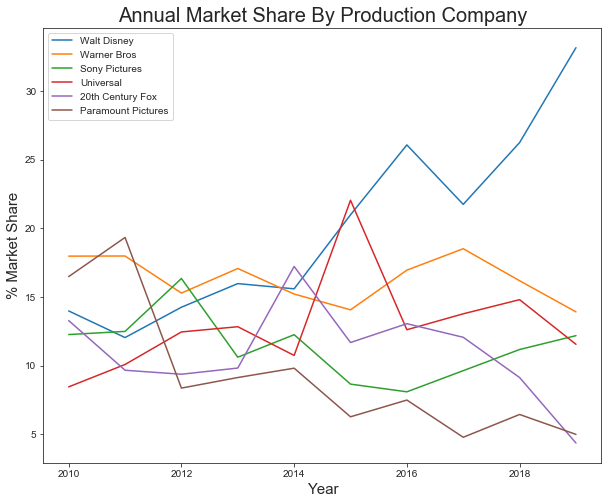

In [28]:
#Create list for Year x variable and 6 y variable lists for Share for the 6 top distributors
x = dists_df[dists_df['Distributor']=='Walt-Disney']['Year'].values
y1 = dists_df[dists_df['Distributor']=='Walt-Disney']['Share'].values
y2 = dists_df[dists_df['Distributor']=='Warner-Bros']['Share'].values
y3 = dists_df[dists_df['Distributor']=='Sony-Pictures']['Share'].values
y4 = dists_df[dists_df['Distributor']=='Universal']['Share'].values
y5 = dists_df[dists_df['Distributor']=='20th-Century-Fox']['Share'].values
y6 = dists_df[dists_df['Distributor']=='Paramount-Pictures']['Share'].values

#Input x and y variables into df for use in seaborn plot
columns = ['Year','Walt Disney', 'Warner Bros', 'Sony Pictures','Universal','20th Century Fox','Paramount Pictures']
data = []
for index in range(0,len(x)):
    data.append([x[index],y1[index]*100,y2[index]*100,y3[index]*100,y4[index]*100,y5[index]*100,y6[index]*100])
df = pd.DataFrame(data, columns=columns)

#Plot x/y variables in multi-line chart and add chart's organizational details
sns.set_style("ticks")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 10
fig, ax = plt.subplots(figsize=[10,8])
sns.lineplot(x='Year', y='value', hue='variable', data = pd.melt(df, ['Year']), ax=ax)
ax.set(xlabel='Year', ylabel='% Market Share')
ax.set_title('Annual Market Share By Production Company')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig('Distributor_Chart.png')

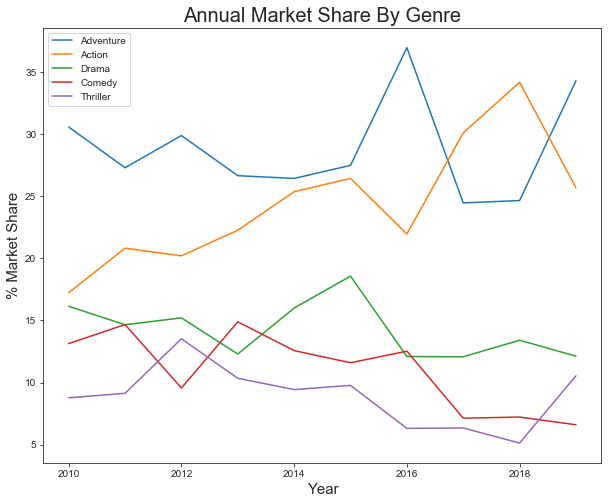

In [47]:
#Create list for Year x variable and 5 y variable lists for Share for the 5 top distributors
x = genres_df[genres_df['Genre']=='Adventure']['Year'].values
y1 = genres_df[genres_df['Genre']=='Adventure']['Share'].values
y2 = genres_df[genres_df['Genre']=='Action']['Share'].values
y3 = genres_df[genres_df['Genre']=='Drama']['Share'].values
y4 = genres_df[genres_df['Genre']=='Comedy']['Share'].values
y5 = genres_df[genres_df['Genre']=='Thriller-or-Suspense']['Share'].values

#Input x and y variables into df for use in seaborn plot
columns = ['Year','Adventure','Action', 'Drama', 'Comedy','Thriller']
data=[]
for index in range(0,len(x)):
    data.append([x[index],float(y1[index]*100),float(y2[index]*100),float(y3[index]*100),float(y4[index]*100),float(y5[index]*100)])
df = pd.DataFrame(data, columns=columns)

#Plot x/y variables in multi-line chart and add chart's organizational details
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=[10,8])
sns.lineplot(x='Year', y='value', hue='variable', data = pd.melt(df, ['Year']), ax=ax)
ax.set(xlabel='Year', ylabel='% Market Share')
ax.set_title('Annual Market Share By Genre')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig('Genre_Chart.png')
